## ViewCube survey analysis-BLV
67 participants (August, 5th 2024).

In [1]:
import pandas as pd
import numpy as np
import math
import csv

%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from matplotlib.patches import Rectangle

In [2]:
import astropy
from astropy import stats

In [3]:
data = pd.read_csv("ViewCube_survey.csv", delimiter=';')
data.fillna("x-x", inplace=True)
data

,Unnamed: 0,ID,Start time,Completion time,REF,Q1,Q2,Q3,Q4,Q5,...,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27
0,0,x-x,x-x,x-x,RES_ESP,Sonificación 1,A la izquierda,Sonificación 2,Sonificación 2,Espectro 2,...,x-x,x-x,x-x,x-x,x-x,x-x,x-x,x-x,x-x,x-x
1,0,x-x,x-x,x-x,RES_ENG,Sonification 1,Left,Sonification 2,Sonification 2,Spectrum 2,...,x-x,x-x,x-x,x-x,x-x,x-x,x-x,x-x,x-x,x-x
2,1,1.0,4/18/24 10:01:49,4/18/24 10:26:12,anonymous,Sonificación 2,A la izquierda,Sonificación 2,Sonificación 2,Espectro 1,...,Mucha experiencia (profesional),Ninguna,Blues,31-40,No,España,Español,"Sí, utilicé auriculares.",Audio 3D / Gaming;,Gran trabajo!
3,2,2.0,4/18/24 14:48:33,4/18/24 15:19:46,anonymous,Sonificación 1,A la izquierda,Sonificación 2,Sonificación 4,Espectro 1,...,Algo de experiencia (hobby/entusiasta),Algo de experiencia (hobby/entusiasta),Rock,21-30,No,ESPAÑA,ESPAÑOL,"Sí, utilicé auriculares.",Intra-aurales;,x-x
4,3,3.0,4/18/24 17:14:38,4/18/24 17:21:38,anonymous,Sonificación 2,A la izquierda,Sonificación 2,Sonificación 1,Espectro 3,...,Algo de experiencia (hobby/entusiasta),Muy básica,Clasica,Prefiero no decirlo,No,España,Español,"No, no lo hice.",No lo sé.;,x-x
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,63,18.0,7/25/24 1:49:37,7/25/24 3:03:34,anonymous,Sonification 1,Left,Sonification 2,Sonification 2,Spectrum 2,...,No experienced,Very experienced (professional),"spatial electroacoustic music, music concrete,...",Prefer not to say,No,Australia,Elnglish,"Yes, I used headphones",Circum-aural;,discriminating between constant tone and rever...
65,64,19.0,7/29/24 10:32:28,7/29/24 10:50:09,anonymous,Sonification 2,Left,Sonification 2,Sonification 3,Spectrum 2,...,No experienced,Some experienced (hobby/enthusiast),Pop music,21-30,No,Spain,Catalan,"Yes, I used headphones",Stereo;,x-x
66,65,3.0,4/15/24 9:17:06,4/15/24 9:51:59,anonymous,Sonification 1,Left,Sonification 3,Sonification 3,Spectrum 2,...,Very experienced (professional),Very basic experience,"Clasic, Rock",41-50,Yes,Spain,Spanish,"Yes, I used headphones",x-x,No queda claro si lo que distingue una regi´òn...
67,66,1.0,5/13/24 11:17:19,5/13/24 11:33:10,anonymous,Sonification 2,Left,Sonification 2,Sonification 2,Spectrum 2,...,Very experienced (professional),Experienced (amateur),Electronic,31-40,No,United Kingdom,English,"Yes, I used headphones",Stereo;,x-x


In [4]:
data_total_responses = len(data)-2
print("Total responses:", data_total_responses)

Total responses: 67


In [5]:
def percentage (participants):
    y = (participants/data_total_responses)*100
    return(y)

In [6]:
def percentage_sub (participants, subgroup_responses):
    z = (participants/subgroup_responses)*100
    return(z)

# Global results

### 12 Simple questions

In [7]:
Q1G = len([i for i in range(len(data)) if ((data.Q1[i] == data.Q1[0]) or (data.Q1[i] == data.Q1[1]))])-2
Q2G = len([i for i in range(len(data)) if ((data.Q2[i] == data.Q2[0]) or (data.Q2[i] == data.Q2[1]))])-2
Q3G = len([i for i in range(len(data)) if ((data.Q3[i] == data.Q3[0]) or (data.Q3[i] == data.Q3[1]))])-2
Q4G = len([i for i in range(len(data)) if ((data.Q4[i] == data.Q4[0]) or (data.Q4[i] == data.Q4[1]))])-2
Q5G = len([i for i in range(len(data)) if ((data.Q5[i] == data.Q5[0]) or (data.Q5[i] == data.Q5[1]))])-2
Q6G = len([i for i in range(len(data)) if ((data.Q6[i] == data.Q6[0]) or (data.Q6[i] == data.Q6[1]))])-2
Q7G = len([i for i in range(len(data)) if ((data.Q7[i] == data.Q7[0]) or (data.Q7[i] == data.Q7[1]))])-2
Q8G = len([i for i in range(len(data)) if ((data.Q8[i] == data.Q8[0]) or (data.Q8[i] == data.Q8[1]))])-2
Q9G = len([i for i in range(len(data)) if ((data.Q9[i] == data.Q9[0]) or (data.Q9[i] == data.Q9[1]))])-2
Q10G = len([i for i in range(len(data)) if ((data.Q10[i] == data.Q10[0]) or (data.Q10[i] == data.Q10[1]))])-2
Q11G = len([i for i in range(len(data)) if ((data.Q11[i] == data.Q11[0]) or (data.Q11[i] == data.Q11[1]))])-2
Q12G = len([i for i in range(len(data)) if ((data.Q12[i] == data.Q12[0]) or (data.Q12[i] == data.Q12[1]))])-2

data_correct = [Q1G,Q2G,Q3G,Q4G,Q5G,Q6G,Q7G,Q8G,Q9G,Q10G,Q11G,Q12G]
data_correct = np.array(data_correct, int)
data_correct 

array([31, 59, 25, 25, 41, 43, 35, 45, 33, 16, 27, 35])

In [8]:
mean_data_correct = np.mean(data_correct)
print("Total responses: ", data_total_responses)
print("Global success mean:", mean_data_correct/data_total_responses)

success_data_correct = np.sum(data_correct)
attempts_data_correct = 12* data_total_responses
conf_data_correct = astropy.stats.binom_conf_interval(success_data_correct, attempts_data_correct, confidence_level=0.68269, interval='jeffreys')
print("Jeffreys confidence interval: ", conf_data_correct)

Total responses:  67
Global success mean: 0.5161691542288558
Jeffreys confidence interval:  [0.49853557 0.53376255]


In [9]:
glob = pd.Series(data_correct/data_total_responses)

In [10]:
glob.describe()

count    12.000000
mean      0.516169
std       0.169515
min       0.238806
25%       0.395522
50%       0.507463
75%       0.619403
max       0.880597
dtype: float64

### 2 Combined questions

In [11]:
check_1 = "Lejos"
check_2 = "derecha"
check_3 = "formación"
check_4 = "Far"
check_5 = "Right"
check_6 = "forming"

Q13G = len([i for i in range(len(data)) if ((check_1 in data.Q13[i]) and (check_2 in data.Q13[i]) and (check_3 in data.Q13[i])) or ((check_4 in data.Q13[i]) and (check_5 in data.Q13[i]) and (check_6 in data.Q13[i]))])-2

check_7 = "Cerca"
check_8 = "izquierda"
check_9 = "vieja"
check_10 = "Close"
check_11 = "Left"
check_12 = "Retired"

Q14G = len([i for i in range(len(data)) if ((check_7 in data.Q14[i]) and (check_8 in data.Q14[i]) and (check_9 in data.Q14[i])) or ((check_10 in data.Q14[i]) and (check_11 in data.Q14[i]) and (check_12 in data.Q14[i]))])-2

combined_correct = [Q13G,Q14G]
combined_correct = np.array(combined_correct, int)

combined_correct

array([11, 10])

In [12]:
mean_combined_correct = np.mean(combined_correct)
print("Global success mean (Combined questions):", mean_combined_correct/data_total_responses)
success_combined_correct = np.sum(combined_correct)
attempts_combined_correct = 2* data_total_responses
conf_combined_correct = astropy.stats.binom_conf_interval(success_combined_correct, attempts_combined_correct, confidence_level=0.68269, interval='jeffreys')
print("Jeffreys confidence interval: ", conf_combined_correct) 

Global success mean (Combined questions): 0.15671641791044777
Jeffreys confidence interval:  [0.1279104  0.19062512]


In [13]:
glob_comb = pd.Series(combined_correct/data_total_responses)
glob_comb.describe()

count    2.000000
mean     0.156716
std      0.010554
min      0.149254
25%      0.152985
50%      0.156716
75%      0.160448
max      0.164179
dtype: float64

## Qualitative questions

In [14]:
# Interactivity
Q15G_good = len([i for i in range(len(data)) if (("Buena" in data.Q15[i]) or ("Muy buena" in data.Q15[i]) or ("Good" in data.Q15[i]) or ("Very good" in data.Q15[i]))])
Q15G_acc = len([i for i in range(len(data)) if (("Aceptable" in data.Q15[i]) or ("Acceptable" in data.Q15[i]))])
Q15G_bad = len([i for i in range(len(data)) if (("Mala" in data.Q15[i]) or ("Muy mala" in data.Q15[i]) or ("Bad" in data.Q15[i]) or ("Very bad" in data.Q15[i]))])
Q15G_xxx = len([i for i in range(len(data)) if ("XXX" in data.Q15[i])])
print("Interactivity 'good' or 'very good':", Q15G_good) 
print("(%)", percentage_sub(Q15G_good, data_total_responses - Q15G_xxx))
print("Interactivity 'acceptable':", Q15G_acc)
print("(%)", percentage_sub(Q15G_acc, data_total_responses - Q15G_xxx))
print("Interactivity 'bad' or 'very bad':", Q15G_bad)
print("(%)", percentage_sub(Q15G_bad, data_total_responses - Q15G_xxx))
print("Participants that couldn't test the application in person:", Q15G_xxx)
print("(%)", percentage(Q15G_xxx))

Interactivity 'good' or 'very good': 34
(%) 80.95238095238095
Interactivity 'acceptable': 6
(%) 14.285714285714285
Interactivity 'bad' or 'very bad': 2
(%) 4.761904761904762
Participants that couldn't test the application in person: 25
(%) 37.3134328358209


In [15]:
data_total_responses

67

In [16]:
# Usefulness
Q16G_good = len([i for i in range(len(data)) if (("Útil" in data.Q16[i]) or ("Muy útil" in data.Q16[i]) or ("Useful" in data.Q16[i]) or ("Very useful" in data.Q16[i]))])
Q16G_bad = len([i for i in range(len(data)) if (("dudosa" in data.Q16[i]) or ("Doubtedly" in data.Q16[i]) or ("Doubtely" in data.Q16[i]) or ("Inútil" in data.Q16[i]) or ("Useless" in data.Q16[i]))])
print("Participants finding it 'useful' or 'very useful':", Q16G_good)
print("(%)", percentage(Q16G_good))
print("Participants finding it 'Doubtedly useful' or 'useless':", Q16G_bad)
print("(%)", percentage(Q16G_bad))

Participants finding it 'useful' or 'very useful': 53
(%) 79.1044776119403
Participants finding it 'Doubtedly useful' or 'useless': 14
(%) 20.8955223880597


In [17]:
# Quality of sound
Q17G_good = len([i for i in range(len(data)) if (("Buen" in data.Q17[i]) or ("Muy buen" in data.Q17[i]) or ("Good" in data.Q17[i]) or ("Nice" in data.Q17[i]))])
Q17G_acc = len([i for i in range(len(data)) if (("Aceptable" in data.Q17[i]) or ("Acceptable" in data.Q17[i]))])
Q17G_bad = len([i for i in range(len(data)) if (("Mal" in data.Q17[i]) or ("Insoportable" in data.Q17[i]) or ("Bad" in data.Q17[i]) or ("Intolerable" in data.Q17[i]))])
print("Sound Quality 'good' or 'very good':", Q17G_good)
print("(%)", percentage(Q17G_good))
print("Sound Quality 'acceptable':", Q17G_acc)
print("(%)", percentage(Q17G_acc))
print("Sound Quality 'bad' or 'very bad':", Q17G_bad)
print("(%)", percentage(Q17G_bad))

Sound Quality 'good' or 'very good': 39
(%) 58.2089552238806
Sound Quality 'acceptable': 23
(%) 34.32835820895522
Sound Quality 'bad' or 'very bad': 5
(%) 7.462686567164178


## Demographics

In [18]:
Astro = len([i for i in range(2,len(data)) if ((("profesional" in data.Q18[i]) or ("professional" in data.Q18[i])))])
Astro_mus_pro = len([i for i in range(2,len(data)) if ((("profesional" in data.Q18[i]) or ("professional" in data.Q18[i])) and (("profesional" in data.Q19[i]) or ("professional" in data.Q19[i])))])
Astro_mus_amt = len([i for i in range(2,len(data)) if ((("profesional" in data.Q18[i]) or ("professional" in data.Q18[i])) and (("experiencia" in data.Q19[i]) or ("experienced" in data.Q19[i])))])
Astro_pro = len([i for i in range(2,len(data)) if ((("profesional" in data.Q18[i]) or ("professional" in data.Q18[i]))) and not ((("profesional" in data.Q19[i]) or ("professional" in data.Q19[i]) or ("experiencia" in data.Q19[i]) or ("experienced" in data.Q19[i])))])
Astro_amt = len([i for i in range(2,len(data)) if ((("entusiasta" in data.Q18[i]) or ("enthusiast" in data.Q18[i]))) and not ((("profesional" in data.Q19[i]) or ("professional" in data.Q19[i]) or ("experiencia" in data.Q19[i]) or ("experienced" in data.Q19[i])))])
Mus_pro = len([i for i in range(2,len(data)) if ((("profesional" in data.Q19[i]) or ("professional" in data.Q19[i]))) and not ((("profesional" in data.Q18[i]) or ("professional" in data.Q18[i]) or ("entusiasta" in data.Q18[i]) or ("enthusiast" in data.Q18[i])))])
Mus_amt = len([i for i in range(2,len(data)) if ("amateur" in data.Q19[i]) and not (("profesional" in data.Q18[i]) or ("professional" in data.Q18[i]) or ("entusiasta" in data.Q18[i]) or ("enthusiast" in data.Q18[i]))])
Non_exp = data_total_responses - Astro_mus_pro - Astro_mus_amt - Astro_pro - Astro_amt - Mus_pro - Mus_amt
BLV = len([i for i in range(2,len(data)) if ("Yes" in data.Q22[i])]) #included within the professional astronomers group
check = Non_exp + Astro_mus_pro + Astro_mus_amt + Astro_pro + Astro_amt + Mus_pro + Mus_amt 
Astro = len([i for i in range(2,len(data)) if ((("profesional" in data.Q18[i]) or ("professional" in data.Q18[i])))])
Non_astro = len([i for i in range(2,len(data)) if not ((("profesional" in data.Q18[i]) or ("professional" in data.Q18[i])))])

print("Total number of participants (check):", check)

print("Number of professional astronomers:", Astro)
print("(%)", percentage(Astro))
print("Number of non professional astronomers:", Non_astro)
print("(%)", percentage(Non_astro))


print("------------------SUBGROUPS----------------------")
print("Number of professional astronomers-musicians:", Astro_mus_pro)
print("(%)", percentage(Astro_mus_pro))
print("Number of professional astronomers-amateur musicians:", Astro_mus_amt)
print("(%)", percentage(Astro_mus_amt))
print("Number of professional astronomers:", Astro_pro)
print("(%)", percentage(Astro_pro))
print("Number of amateur astronomers:", Astro_amt)
print("(%)", percentage(Astro_amt))
print("Number of professional musicians non-astronomers(professional and amateur):", Mus_pro)
print("(%)", percentage(Mus_pro))
print("Number of amateur musicians non-astronomers(professional and amateur):", Mus_amt)
print("(%)", percentage(Mus_amt))
print("Number of non-experienced:", Non_exp)
print("(%)", percentage(Non_exp))
print("Number of BLV participants:", BLV)
print("(%)", percentage(BLV))

Total number of participants (check): 67
Number of professional astronomers: 31
(%) 46.26865671641791
Number of non professional astronomers: 36
(%) 53.73134328358209
------------------SUBGROUPS----------------------
Number of professional astronomers-musicians: 1
(%) 1.4925373134328357
Number of professional astronomers-amateur musicians: 15
(%) 22.388059701492537
Number of professional astronomers: 16
(%) 23.88059701492537
Number of amateur astronomers: 5
(%) 7.462686567164178
Number of professional musicians non-astronomers(professional and amateur): 4
(%) 5.970149253731343
Number of amateur musicians non-astronomers(professional and amateur): 4
(%) 5.970149253731343
Number of non-experienced: 22
(%) 32.83582089552239
Number of BLV participants: 2
(%) 2.9850746268656714


In [19]:
#Age range
Q21G_21 = len([i for i in range(len(data)) if (("Menos" in data.Q21[i]) or ("Under" in data.Q21[i]))])
Q21G_21_30 = len([i for i in range(len(data)) if (("21-30" in data.Q21[i]))])
Q21G_31_40 = len([i for i in range(len(data)) if (("31-40" in data.Q21[i]))])
Q21G_41_50 = len([i for i in range(len(data)) if (("41-50" in data.Q21[i]))])
Q21G_51_60 = len([i for i in range(len(data)) if (("51-60" in data.Q21[i]))])
Q21G_60 = len([i for i in range(len(data)) if (("Más" in data.Q21[i]) or ("Over" in data.Q21[i]))])

print("Number of participants under 21:", Q21G_21)
print("(%)", percentage(Q21G_21))
print("Number of participants between 21 and 30 :", Q21G_21_30)
print("(%)", percentage(Q21G_21_30))
print("Number of participants between 31 and 40 :", Q21G_31_40)
print("(%)", percentage(Q21G_31_40))
print("Number of participants between 41 and 50 :", Q21G_41_50)
print("(%)", percentage(Q21G_41_50))
print("Number of participants between 51 and 60 :", Q21G_51_60)
print("(%)", percentage(Q21G_51_60))
print("Number of participants over 60 :", Q21G_60)
print("(%)", percentage(Q21G_60))

Number of participants under 21: 1
(%) 1.4925373134328357
Number of participants between 21 and 30 : 18
(%) 26.865671641791046
Number of participants between 31 and 40 : 9
(%) 13.432835820895523
Number of participants between 41 and 50 : 21
(%) 31.343283582089555
Number of participants between 51 and 60 : 6
(%) 8.955223880597014
Number of participants over 60 : 10
(%) 14.925373134328357


## Appending Global results

In [20]:
column_list = ["Global", "Non-BLV astronomers","BLV astronomers"]
participants_list = []
success_list = []
Jeff_low_list = []
Jeff_high_list = []
std_list = []
comb_success_list = []
comb_Jeff_low_list = []
comb_Jeff_high_list = []
comb_std_list = []
interactivity_list = []
useful_list = []
sound_list = []

In [21]:
participants_list.append(data_total_responses)
success_list.append(glob.describe()["mean"])
Jeff_low_list.append(conf_data_correct[0])
Jeff_high_list.append(conf_data_correct[1])
std_list.append(glob.describe()["std"])
comb_success_list.append(glob_comb.describe()["mean"])
comb_Jeff_low_list.append(conf_combined_correct[0])
comb_Jeff_high_list.append(conf_combined_correct[1])
comb_std_list.append(glob_comb.describe()["std"])
interactivity_list.append(percentage_sub(Q15G_good, data_total_responses - Q15G_xxx))
useful_list.append(percentage(Q16G_good))
sound_list.append(percentage(Q17G_good))

# Experts: Professional astronomers-non BLV

In [22]:
experts_list = []
experts_index = []
experts_counter = 0
for i in range(len(data)):
    if (("profesional" in data.Q18[i]) or ("professional" in data.Q18[i]) and ("No" in data.Q22[i])):        
        experts_counter += 1
        current_row = data.iloc[i]
        experts_list.append(current_row)
        experts_index.append(i)
        
print("Number of Professional astronomers:", experts_counter)
experts_df = pd.DataFrame(experts_list)
experts_df

Number of Professional astronomers: 29


,Unnamed: 0,ID,Start time,Completion time,REF,Q1,Q2,Q3,Q4,Q5,...,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27
2,1,1.0,4/18/24 10:01:49,4/18/24 10:26:12,anonymous,Sonificación 2,A la izquierda,Sonificación 2,Sonificación 2,Espectro 1,...,Mucha experiencia (profesional),Ninguna,Blues,31-40,No,España,Español,"Sí, utilicé auriculares.",Audio 3D / Gaming;,Gran trabajo!
5,4,4.0,4/18/24 16:09:19,4/18/24 17:34:52,anonymous,Sonificación 2,A la izquierda,Sonificación 3,Sonificación 3,Espectro 1,...,Mucha experiencia (profesional),Muy básica,clásica,51-60,No,España,Castellano,"Sí, utilicé auriculares.",Audio 3D / Gaming;,x-x
16,15,15.0,4/23/24 12:44:04,4/23/24 13:08:00,anonymous,Sonificación 1,A la izquierda,Sonificación 2,Sonificación 2,Espectro 1,...,Mucha experiencia (profesional),Bastante experiencia (amateur),"Clasica, Jazz, Cantautores",41-50,No,España,Italiano,"Sí, utilicé auriculares.",Estéreo;,x-x
20,19,19.0,4/25/24 11:19:03,4/25/24 11:32:28,anonymous,Sonificación 2,A la izquierda,Sonificación 3,Sonificación 2,Espectro 2,...,Mucha experiencia (profesional),Ninguna,Techno melódico,21-30,No,España,Español,"Sí, utilicé auriculares.",Estéreo;Circum-aurales;,Todo mi apoyo para este proyecto tan necesario!
21,20,20.0,4/25/24 11:30:57,4/25/24 11:46:09,anonymous,Sonificación 1,A la izquierda,Sonificación 2,Sonificación 2,Espectro 2,...,Mucha experiencia (profesional),Muy básica,"Pop, rock, música española/latina y francesa, ...",21-30,No,España,Francés,"Sí, utilicé auriculares.",Audio 3D / Gaming;,x-x
22,21,21.0,4/25/24 14:36:30,4/25/24 15:03:00,anonymous,Sonificación 2,A la izquierda,Sonificación 2,Sonificación 2,Espectro 2,...,Mucha experiencia (profesional),Algo de experiencia (hobby/entusiasta),"jazz, clásica",41-50,No,españa,español,"Sí, utilicé auriculares.",Circum-aurales;,x-x
29,28,28.0,4/29/24 11:22:35,4/29/24 11:31:38,anonymous,Sonificación 2,A la izquierda,Sonificación 2,Sonificación 2,Espectro 2,...,Mucha experiencia (profesional),Algo de experiencia (hobby/entusiasta),"Música clásica, latino, pop-rock.",21-30,No,España,Español,"Sí, utilicé auriculares.",Intra-aurales;,x-x
32,31,31.0,5/2/24 18:31:56,5/2/24 18:51:31,anonymous,Sonificación 1,A la izquierda,Sonificación 3,Sonificación 2,Espectro 2,...,Mucha experiencia (profesional),Bastante experiencia (amateur),Jazz,41-50,No,España,Español,"Sí, utilicé auriculares.",Estéreo;,La diferencia entre zona con formación estelar...
35,34,34.0,5/6/24 11:21:54,5/6/24 11:42:11,anonymous,Sonificación 2,A la derecha,Sonificación 2,Sonificación 2,Espectro 2,...,Mucha experiencia (profesional),Bastante experiencia (amateur),Clásica y pop,51-60,No,España,Español,"Sí, utilicé auriculares.",Estéreo;,"Salvo la posición de los sonidos, las demás ca..."
37,36,36.0,5/24/24 1:59:41,5/24/24 4:34:47,anonymous,Sonificación 2,A la izquierda,Sonificación 2,Sonificación 2,Espectro 2,...,Mucha experiencia (profesional),Algo de experiencia (hobby/entusiasta),"Clásica, Rock, Electrónica, un poco de todo",41-50,No,España,español,"Sí, utilicé auriculares.",Estéreo;,Un trabajo muy interesante. Enhorabuena


In [23]:
experts_down = experts_df.sample(frac=0.06, replace=False, random_state=1)
experts_down

,Unnamed: 0,ID,Start time,Completion time,REF,Q1,Q2,Q3,Q4,Q5,...,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27
43,42,2.0,4/25/24 9:45:02,4/25/24 12:17:33,anonymous,Sonificación 2,A la izquierda,Sonificación 3,Sonificación 2,Espectro 2,...,Mucha experiencia (profesional),Algo de experiencia (hobby/entusiasta),Música clásica,41-50,No,Spain,Catalan,"Sí, utilicé auriculares.",Estéreo;Circum-aurales;,x-x
51,50,5.0,5/2/24 20:11:15,5/2/24 20:28:04,anonymous,Sonification 1,Left,Sonification 3,Sonification 2,Spectrum 2,...,Very experienced (professional),Some experienced (hobby/enthusiast),Classical. Rock,Over 60,No,United States,English,"Yes, I used headphones",Stereo;,Use the word Pitch instead of Reverberation --...


In [24]:
experts_index2 = []
experts_counter2 = 0

for i in range(len(experts_down)):
    experts_index2.append(experts_down.index[i])
    experts_counter2 += 1

experts_index2

[43, 51]

In [25]:
Q1E = len([i for i in range(len(experts_down)) if ((experts_down.Q1[experts_index2[i]] == data.Q1[0]) or (experts_down.Q1[experts_index2[i]] == data.Q1[1]))])
Q2E = len([i for i in range(len(experts_down)) if ((experts_down.Q2[experts_index2[i]] == data.Q2[0]) or (experts_down.Q2[experts_index2[i]] == data.Q2[1]))])
Q3E = len([i for i in range(len(experts_down)) if ((experts_down.Q3[experts_index2[i]] == data.Q3[0]) or (experts_down.Q3[experts_index2[i]] == data.Q3[1]))])
Q4E = len([i for i in range(len(experts_down)) if ((experts_down.Q4[experts_index2[i]] == data.Q4[0]) or (experts_down.Q4[experts_index2[i]] == data.Q4[1]))])
Q5E = len([i for i in range(len(experts_down)) if ((experts_down.Q5[experts_index2[i]] == data.Q5[0]) or (experts_down.Q5[experts_index2[i]] == data.Q5[1]))])
Q6E = len([i for i in range(len(experts_down)) if ((experts_down.Q6[experts_index2[i]] == data.Q6[0]) or (experts_down.Q6[experts_index2[i]] == data.Q6[1]))])
Q7E = len([i for i in range(len(experts_down)) if ((experts_down.Q7[experts_index2[i]] == data.Q7[0]) or (experts_down.Q7[experts_index2[i]] == data.Q7[1]))])
Q8E = len([i for i in range(len(experts_down)) if ((experts_down.Q8[experts_index2[i]] == data.Q8[0]) or (experts_down.Q8[experts_index2[i]] == data.Q8[1]))])
Q9E = len([i for i in range(len(experts_down)) if ((experts_down.Q9[experts_index2[i]] == data.Q9[0]) or (experts_down.Q9[experts_index2[i]] == data.Q9[1]))])
Q10E = len([i for i in range(len(experts_down)) if ((experts_down.Q10[experts_index2[i]] == data.Q10[0]) or (experts_down.Q10[experts_index2[i]] == data.Q10[1]))])
Q11E = len([i for i in range(len(experts_down)) if ((experts_down.Q11[experts_index2[i]] == data.Q11[0]) or (experts_down.Q11[experts_index2[i]] == data.Q11[1]))])
Q12E = len([i for i in range(len(experts_down)) if ((experts_down.Q12[experts_index2[i]] == data.Q12[0]) or (experts_down.Q12[experts_index2[i]] == data.Q12[1]))])

experts_correct = [Q1E,Q2E,Q3E,Q4E,Q5E,Q6E,Q7E,Q8E,Q9E,Q10E,Q11E,Q12E]
experts_correct = np.array(experts_correct, int)
experts_correct 

array([1, 2, 0, 1, 2, 1, 1, 1, 1, 0, 1, 1])

In [26]:
experts_total_responses = len(experts_down)
mean_experts_correct = np.mean(experts_correct)
print("Total responses: ", experts_total_responses)
print("Professional astronomers success mean:", mean_experts_correct/experts_total_responses)

success_experts_correct = np.sum(experts_correct)
attempts_experts_correct = 12* experts_total_responses
conf_experts_correct = astropy.stats.binom_conf_interval(success_experts_correct, attempts_experts_correct, confidence_level=0.68269, interval='jeffreys')
print("Jeffreys confidence interval: ", conf_experts_correct) 

Total responses:  2
Professional astronomers success mean: 0.5
Jeffreys confidence interval:  [0.40002028 0.59997972]


In [27]:
experts = pd.Series(experts_correct/experts_total_responses)
experts.describe()

count    12.000000
mean      0.500000
std       0.301511
min       0.000000
25%       0.500000
50%       0.500000
75%       0.500000
max       1.000000
dtype: float64

In [28]:
Q13E = len([i for i in range(len(experts_down)) if ((check_1 in experts_down.Q13[experts_index2[i]]) and (check_2 in experts_down.Q13[experts_index2[i]]) and (check_3 in experts_down.Q13[experts_index2[i]])) or ((check_4 in experts_down.Q13[experts_index2[i]]) and (check_5 in experts_down.Q13[experts_index2[i]]) and (check_6 in experts_down.Q13[experts_index2[i]]))])
Q14E = len([i for i in range(len(experts_down)) if ((check_7 in experts_down.Q14[experts_index2[i]]) and (check_8 in experts_down.Q14[experts_index2[i]]) and (check_9 in experts_down.Q14[experts_index2[i]])) or ((check_10 in experts_down.Q14[experts_index2[i]]) and (check_11 in experts_down.Q14[experts_index2[i]]) and (check_12 in experts_down.Q14[experts_index2[i]]))])

experts_combined_correct = [Q13E,Q14E]
experts_combined_correct = np.array(experts_combined_correct, int)

experts_combined_correct

array([2, 0])

In [29]:
mean_experts_combined_correct = np.mean(experts_combined_correct)
print("Professional astronomers success mean (Combined questions):", mean_experts_combined_correct/experts_total_responses)
success_experts_combined_correct = np.sum(experts_combined_correct)
attempts_experts_combined_correct = 2* experts_total_responses
conf_experts_combined_correct = astropy.stats.binom_conf_interval(success_experts_combined_correct, attempts_experts_combined_correct, confidence_level=0.68269, interval='jeffreys')
print("Jeffreys confidence interval: ", conf_experts_combined_correct) 

Professional astronomers success mean (Combined questions): 0.5
Jeffreys confidence interval:  [0.27759981 0.72240019]


In [30]:
experts_combined = pd.Series(experts_combined_correct/experts_total_responses)
experts_combined.describe()

count    2.000000
mean     0.500000
std      0.707107
min      0.000000
25%      0.250000
50%      0.500000
75%      0.750000
max      1.000000
dtype: float64

## Qualitative

In [31]:
# Interactivity
Q15E_good = len([i for i in range(len(experts_down)) if (("Buena" in experts_down.Q15[experts_index2[i]]) or ("Muy buena" in experts_down.Q15[experts_index2[i]]) or ("Good" in experts_down.Q15[experts_index2[i]]) or ("Very good" in experts_down.Q15[experts_index2[i]]))])
Q15E_acc = len([i for i in range(len(experts_down)) if (("Aceptable" in experts_down.Q15[experts_index2[i]]) or ("Acceptable" in experts_down.Q15[experts_index2[i]]))])
Q15E_bad = len([i for i in range(len(experts_down)) if (("Mala" in experts_down.Q15[experts_index2[i]]) or ("Muy mala" in experts_down.Q15[experts_index2[i]]) or ("Bad" in experts_down.Q15[experts_index2[i]]) or ("Very bad" in experts_down.Q15[experts_index2[i]]))])
Q15E_xxx = len([i for i in range(len(experts_down)) if (("XXX" in experts_down.Q15[experts_index2[i]]))])
print("Interactivity 'good' or 'very good':", Q15E_good) 
print("(%)", percentage_sub(Q15E_good, experts_counter2 - Q15E_xxx))
print("Interactivity 'acceptable':", Q15E_acc)
print("(%)", percentage_sub(Q15E_acc, experts_counter2 - Q15E_xxx))
print("Interactivity 'bad' or 'very bad':", Q15E_bad)
print("(%)", percentage_sub(Q15E_bad, experts_counter2 - Q15E_xxx))
print("Participants that couldn't test the application in person:", Q15E_xxx)
print("(%)", percentage_sub(Q15E_xxx, experts_counter2))

Interactivity 'good' or 'very good': 2
(%) 100.0
Interactivity 'acceptable': 0
(%) 0.0
Interactivity 'bad' or 'very bad': 0
(%) 0.0
Participants that couldn't test the application in person: 0
(%) 0.0


In [32]:
# Usefulness
Q16E_good = len([i for i in range(len(experts_down)) if (("Útil" in experts_down.Q16[experts_index2[i]]) or ("Muy útil" in experts_down.Q16[experts_index2[i]]) or ("Useful" in experts_down.Q16[experts_index2[i]]) or ("Very useful" in experts_down.Q16[experts_index2[i]]))])
Q16E_bad = len([i for i in range(len(experts_down)) if (("dudosa" in experts_down.Q16[experts_index2[i]]) or ("Doubtedly" in experts_down.Q16[experts_index2[i]]) or ("Doubtely" in experts_down.Q16[experts_index2[i]]) or ("Inútil" in experts_down.Q16[experts_index2[i]]) or ("Useless" in experts_down.Q16[experts_index2[i]]))])
print("Participants finding it 'useful' or 'very useful':", Q16E_good)
print("(%)", percentage_sub(Q16E_good, experts_counter2))
print("Participants finding it 'Doubtedly useful' or 'useless':", Q16E_bad)
print("(%)", percentage_sub(Q16E_bad, experts_counter2))

Participants finding it 'useful' or 'very useful': 1
(%) 50.0
Participants finding it 'Doubtedly useful' or 'useless': 1
(%) 50.0


In [33]:
# Quality of sound
Q17E_good = len([i for i in range(len(experts_down)) if (("Buen" in experts_down.Q17[experts_index2[i]]) or ("Muy buen" in experts_down.Q17[experts_index2[i]]) or ("Good" in experts_down.Q17[experts_index2[i]]) or ("Nice" in experts_down.Q17[experts_index2[i]]))])
Q17E_acc = len([i for i in range(len(experts_down)) if (("Aceptable" in experts_down.Q17[experts_index2[i]]) or ("Acceptable" in experts_down.Q17[experts_index2[i]]))])
Q17E_bad = len([i for i in range(len(experts_down)) if (("Mal" in experts_down.Q17[experts_index2[i]]) or ("Insoportable" in experts_down.Q17[experts_index2[i]]) or ("Bad" in experts_down.Q17[experts_index2[i]]) or ("Intolerable" in experts_down.Q17[experts_index2[i]]))])
print("Sound Quality 'good' or 'very good':", Q17E_good)
print("(%)", percentage_sub(Q17E_good, experts_counter2))
print("Sound Quality 'acceptable':", Q17E_acc)
print("(%)", percentage(Q17E_acc))
print("Sound Quality 'bad' or 'very bad':", Q17E_bad)
print("(%)", percentage_sub(Q17E_bad, experts_counter2))

Sound Quality 'good' or 'very good': 2
(%) 100.0
Sound Quality 'acceptable': 0
(%) 0.0
Sound Quality 'bad' or 'very bad': 0
(%) 0.0


## Appending results

In [34]:
participants_list.append(experts_counter2)
success_list.append(experts.describe()["mean"])
Jeff_low_list.append(conf_experts_correct[0])
Jeff_high_list.append(conf_experts_correct[1])
std_list.append(experts.describe()["std"])
comb_success_list.append(experts_combined.describe()["mean"])
comb_Jeff_low_list.append(conf_experts_combined_correct[0])
comb_Jeff_high_list.append(conf_experts_combined_correct[1])
comb_std_list.append(experts_combined.describe()["std"])
interactivity_list.append(percentage_sub(Q15E_good, experts_counter2 - Q15E_xxx))
useful_list.append(percentage_sub(Q16E_good, experts_counter2))
sound_list.append(percentage_sub(Q17E_good, experts_counter2))

# BLV professional astronomers (recycling astromus)

In [35]:
BLV_list = []
BLV_index = []
BLV_counter = 0
for i in range(len(data)):
    if ("Yes" in data.Q22[i]):
        BLV_counter += 1
        current_row = data.iloc[i]
        BLV_list.append(current_row)
        BLV_index.append(i)
        
print("Number of Professional astronomers BLV:", BLV_counter)
BLV_df = pd.DataFrame(BLV_list)
BLV_df

Number of Professional astronomers BLV: 2


,Unnamed: 0,ID,Start time,Completion time,REF,Q1,Q2,Q3,Q4,Q5,...,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27
66,65,3.0,4/15/24 9:17:06,4/15/24 9:51:59,anonymous,Sonification 1,Left,Sonification 3,Sonification 3,Spectrum 2,...,Very experienced (professional),Very basic experience,"Clasic, Rock",41-50,Yes,Spain,Spanish,"Yes, I used headphones",x-x,No queda claro si lo que distingue una regi´òn...
68,67,2.0,7/23/24 15:06:15,7/23/24 15:31:47,anonymous,Sonification 2,Left,Sonification 2,Sonification 2,Spectrum 2,...,Very experienced (professional),Experienced (amateur),Alternative rock,41-50,Yes,United Kingdom,English,"Yes, I used headphones",Stereo;,x-x


In [36]:
Q1BLV = len([i for i in range(len(BLV_df)) if ((BLV_df.Q1[BLV_index[i]] == data.Q1[0]) or (BLV_df.Q1[BLV_index[i]] == data.Q1[1]))])
Q2BLV = len([i for i in range(len(BLV_df)) if ((BLV_df.Q2[BLV_index[i]] == data.Q2[0]) or (BLV_df.Q2[BLV_index[i]] == data.Q2[1]))])
Q3BLV = len([i for i in range(len(BLV_df)) if ((BLV_df.Q3[BLV_index[i]] == data.Q3[0]) or (BLV_df.Q3[BLV_index[i]] == data.Q3[1]))])
Q4BLV = len([i for i in range(len(BLV_df)) if ((BLV_df.Q4[BLV_index[i]] == data.Q4[0]) or (BLV_df.Q4[BLV_index[i]] == data.Q4[1]))])
Q5BLV = len([i for i in range(len(BLV_df)) if ((BLV_df.Q5[BLV_index[i]] == data.Q5[0]) or (BLV_df.Q5[BLV_index[i]] == data.Q5[1]))])
Q6BLV = len([i for i in range(len(BLV_df)) if ((BLV_df.Q6[BLV_index[i]] == data.Q6[0]) or (BLV_df.Q6[BLV_index[i]] == data.Q6[1]))])
Q7BLV = len([i for i in range(len(BLV_df)) if ((BLV_df.Q7[BLV_index[i]] == data.Q7[0]) or (BLV_df.Q7[BLV_index[i]] == data.Q7[1]))])
Q8BLV = len([i for i in range(len(BLV_df)) if ((BLV_df.Q8[BLV_index[i]] == data.Q8[0]) or (BLV_df.Q8[BLV_index[i]] == data.Q8[1]))])
Q9BLV = len([i for i in range(len(BLV_df)) if ((BLV_df.Q9[BLV_index[i]] == data.Q9[0]) or (BLV_df.Q9[BLV_index[i]] == data.Q9[1]))])
Q10BLV = len([i for i in range(len(BLV_df)) if ((BLV_df.Q10[BLV_index[i]] == data.Q10[0]) or (BLV_df.Q10[BLV_index[i]] == data.Q10[1]))])
Q11BLV = len([i for i in range(len(BLV_df)) if ((BLV_df.Q11[BLV_index[i]] == data.Q11[0]) or (BLV_df.Q11[BLV_index[i]] == data.Q11[1]))])
Q12BLV = len([i for i in range(len(BLV_df)) if ((BLV_df.Q12[BLV_index[i]] == data.Q12[0]) or (BLV_df.Q12[BLV_index[i]] == data.Q12[1]))])

BLV_correct = [Q1BLV,Q2BLV,Q3BLV,Q4BLV,Q5BLV,Q6BLV,Q7BLV,Q8BLV,Q9BLV,Q10BLV,Q11BLV,Q12BLV]
BLV_correct = np.array(BLV_correct, int)
BLV_correct 

array([1, 2, 0, 0, 2, 1, 1, 2, 2, 0, 1, 1])

In [37]:
BLV_total_responses = len(BLV_df)
mean_BLV_correct = np.mean(BLV_correct)
print("Total responses: ", BLV_total_responses)
print("BLV professional astronomers success mean:", mean_BLV_correct/BLV_total_responses)

success_BLV_correct = np.sum(BLV_correct)
attempts_BLV_correct = 12* BLV_total_responses
conf_BLV_correct = astropy.stats.binom_conf_interval(success_BLV_correct, attempts_BLV_correct, confidence_level=0.68269, interval='jeffreys')
print("Jeffreys confidence interval: ", conf_BLV_correct) 

Total responses:  2
BLV professional astronomers success mean: 0.5416666666666666
Jeffreys confidence interval:  [0.44033182 0.63961517]


In [38]:
BLV = pd.Series(BLV_correct/BLV_total_responses)
BLV.describe()

count    12.000000
mean      0.541667
std       0.396481
min       0.000000
25%       0.375000
50%       0.500000
75%       1.000000
max       1.000000
dtype: float64

In [39]:
Q13BLV = len([i for i in range(len(BLV_df)) if ((check_1 in BLV_df.Q13[BLV_index[i]]) and (check_2 in BLV_df.Q13[BLV_index[i]]) and (check_3 in BLV_df.Q13[BLV_index[i]])) or ((check_4 in BLV_df.Q13[BLV_index[i]]) and (check_5 in BLV_df.Q13[BLV_index[i]]) and (check_6 in BLV_df.Q13[BLV_index[i]]))])

Q14BLV = len([i for i in range(len(BLV_df)) if ((check_7 in BLV_df.Q14[BLV_index[i]]) and (check_8 in BLV_df.Q14[BLV_index[i]]) and (check_9 in BLV_df.Q14[BLV_index[i]])) or ((check_10 in BLV_df.Q14[BLV_index[i]]) and (check_11 in BLV_df.Q14[BLV_index[i]]) and (check_12 in BLV_df.Q14[BLV_index[i]]))])

BLV_combined_correct = [Q13BLV,Q14BLV]
BLV_combined_correct = np.array(BLV_combined_correct, int)

BLV_combined_correct

array([0, 0])

In [40]:
mean_BLV_combined_correct = np.mean(BLV_combined_correct)
print("BLV professional astronomers success mean (Combined questions):", mean_BLV_combined_correct/BLV_total_responses)
success_BLV_combined_correct = np.sum(BLV_combined_correct)
attempts_BLV_combined_correct = 2* BLV_total_responses
conf_BLV_combined_correct = astropy.stats.binom_conf_interval(success_BLV_combined_correct, attempts_BLV_combined_correct, confidence_level=0.68269, interval='jeffreys')
print("Jeffreys confidence interval: ", conf_BLV_combined_correct) 

BLV professional astronomers success mean (Combined questions): 0.0
Jeffreys confidence interval:  [0.         0.20792572]


In [41]:
BLV_combined = pd.Series(BLV_combined_correct/BLV_total_responses)
BLV_combined.describe()

count    2.0
mean     0.0
std      0.0
min      0.0
25%      0.0
50%      0.0
75%      0.0
max      0.0
dtype: float64

## Qualitative

In [42]:
# Interactivity
Q15BLV_good = 1 #Lack of this question in the first version of the survey (1 BLV participant tried it in person)
Q15BLV_acc = 0
Q15BLV_bad = 0
Q15BLV_xxx = 0
print("Interactivity 'good' or 'very good':", Q15BLV_good) 
print("(%)", percentage_sub(Q15BLV_good, BLV_counter - Q15BLV_xxx))
print("Interactivity 'acceptable':", Q15BLV_acc)
print("(%)", percentage_sub(Q15BLV_acc, BLV_counter - Q15BLV_xxx))
print("Interactivity 'bad' or 'very bad':", Q15BLV_bad)
print("(%)", percentage_sub(Q15BLV_bad, BLV_counter - Q15BLV_xxx))
print("Participants that couldn't test the application in person:", Q15BLV_xxx)
print("(%)", percentage_sub(Q15BLV_xxx, BLV_counter))

Interactivity 'good' or 'very good': 1
(%) 50.0
Interactivity 'acceptable': 0
(%) 0.0
Interactivity 'bad' or 'very bad': 0
(%) 0.0
Participants that couldn't test the application in person: 0
(%) 0.0


In [43]:
# Usefulness
Q16BLV_good = len([i for i in range(len(BLV_df)) if (("Útil" in BLV_df.Q16[BLV_index[i]]) or ("Muy útil" in BLV_df.Q16[BLV_index[i]]) or ("Useful" in BLV_df.Q16[BLV_index[i]]) or ("Very useful" in BLV_df.Q16[BLV_index[i]]))])
Q16BLV_bad = len([i for i in range(len(BLV_df)) if (("dudosa" in BLV_df.Q16[BLV_index[i]]) or ("Doubtedly" in BLV_df.Q16[BLV_index[i]]) or ("Doubtely" in BLV_df.Q16[BLV_index[i]]) or ("Inútil" in BLV_df.Q16[BLV_index[i]]) or ("Useless" in BLV_df.Q16[BLV_index[i]]))])
print("Participants finding it 'useful' or 'very useful':", Q16BLV_good)
print("(%)", percentage_sub(Q16BLV_good, BLV_counter))
print("Participants finding it 'Doubtedly useful' or 'useless':", Q16BLV_bad)
print("(%)", percentage_sub(Q16BLV_bad, BLV_counter))

Participants finding it 'useful' or 'very useful': 2
(%) 100.0
Participants finding it 'Doubtedly useful' or 'useless': 0
(%) 0.0


In [44]:
# Quality of sound
Q17BLV_good = len([i for i in range(len(BLV_df)) if (("Buen" in BLV_df.Q17[BLV_index[i]]) or ("Muy buen" in BLV_df.Q17[BLV_index[i]]) or ("Good" in BLV_df.Q17[BLV_index[i]]) or ("Nice" in BLV_df.Q17[BLV_index[i]]))])
Q17BLV_acc = len([i for i in range(len(BLV_df)) if (("Aceptable" in BLV_df.Q17[BLV_index[i]]) or ("Acceptable" in BLV_df.Q17[BLV_index[i]]))])
Q17BLV_bad = len([i for i in range(len(BLV_df)) if (("Mal" in BLV_df.Q17[BLV_index[i]]) or ("Insoportable" in BLV_df.Q17[BLV_index[i]]) or ("Bad" in BLV_df.Q17[BLV_index[i]]) or ("Intolerable" in BLV_df.Q17[BLV_index[i]]))])
print("Sound Quality 'good' or 'very good':", Q17BLV_good)
print("(%)", percentage_sub(Q17BLV_good, BLV_counter))
print("Sound Quality 'acceptable':", Q17BLV_acc)
print("(%)", percentage_sub(Q17BLV_acc, BLV_counter))
print("Sound Quality 'bad' or 'very bad':", Q17BLV_bad)
print("(%)", percentage_sub(Q17BLV_bad, BLV_counter))

Sound Quality 'good' or 'very good': 2
(%) 100.0
Sound Quality 'acceptable': 0
(%) 0.0
Sound Quality 'bad' or 'very bad': 0
(%) 0.0


## Appending results

In [45]:
participants_list.append(BLV_counter)
success_list.append(BLV.describe()["mean"])
Jeff_low_list.append(conf_BLV_correct[0])
Jeff_high_list.append(conf_BLV_correct[1])
std_list.append(BLV.describe()["std"])
comb_success_list.append(BLV_combined.describe()["mean"])
comb_Jeff_low_list.append(conf_BLV_combined_correct[0])
comb_Jeff_high_list.append(conf_BLV_combined_correct[1])
comb_std_list.append(BLV_combined.describe()["std"])
interactivity_list.append(percentage_sub(Q15BLV_good, BLV_counter - Q15BLV_xxx))
useful_list.append(percentage_sub(Q16BLV_good, BLV_counter))
sound_list.append(percentage_sub(Q17BLV_good, BLV_counter))

## Generating a CSV file

In [46]:
with open("ViewCube_Stats-BLV.csv", "w") as csvfile:
    write = csv.writer(csvfile)
    write.writerow(["Group", "Participants", "Success", "Jeff_low", "Jeff_high", "std", "comb_Success", "comb_Jeff_low", "comb_Jeff_high", "comb_std", "interactivity", "useful", "sound"])
    for i in range(len(column_list)):
        write.writerow([column_list[i], participants_list[i], success_list[i], Jeff_low_list[i], Jeff_high_list[i], std_list[i], comb_success_list[i], comb_Jeff_low_list[i], comb_Jeff_high_list[i], comb_std_list[i], interactivity_list[i], useful_list[i], sound_list[i]])

## Ploting

In [47]:
data = pd.read_csv("ViewCube_Stats-BLV.csv", delimiter=',')
data

,Group,Participants,Success,Jeff_low,Jeff_high,std,comb_Success,comb_Jeff_low,comb_Jeff_high,comb_std,interactivity,useful,sound
0,Global,67,0.516169,0.498536,0.533763,0.169515,0.156716,0.12791,0.190625,0.010554,80.952381,79.104478,58.208955
1,Non-BLV astronomers,2,0.500000,0.400020,0.599980,0.301511,0.500000,0.27760,0.722400,0.707107,100.000000,50.000000,100.000000
2,BLV astronomers,2,0.541667,0.440332,0.639615,0.396481,0.000000,0.00000,0.207926,0.000000,50.000000,100.000000,100.000000


In [48]:
means = data['Success']
labels = data['Group']
participants = data['Participants']
comb_means = data['comb_Success']

## Success rate: Global | Non-BLV astronomers) | BLV astronomers

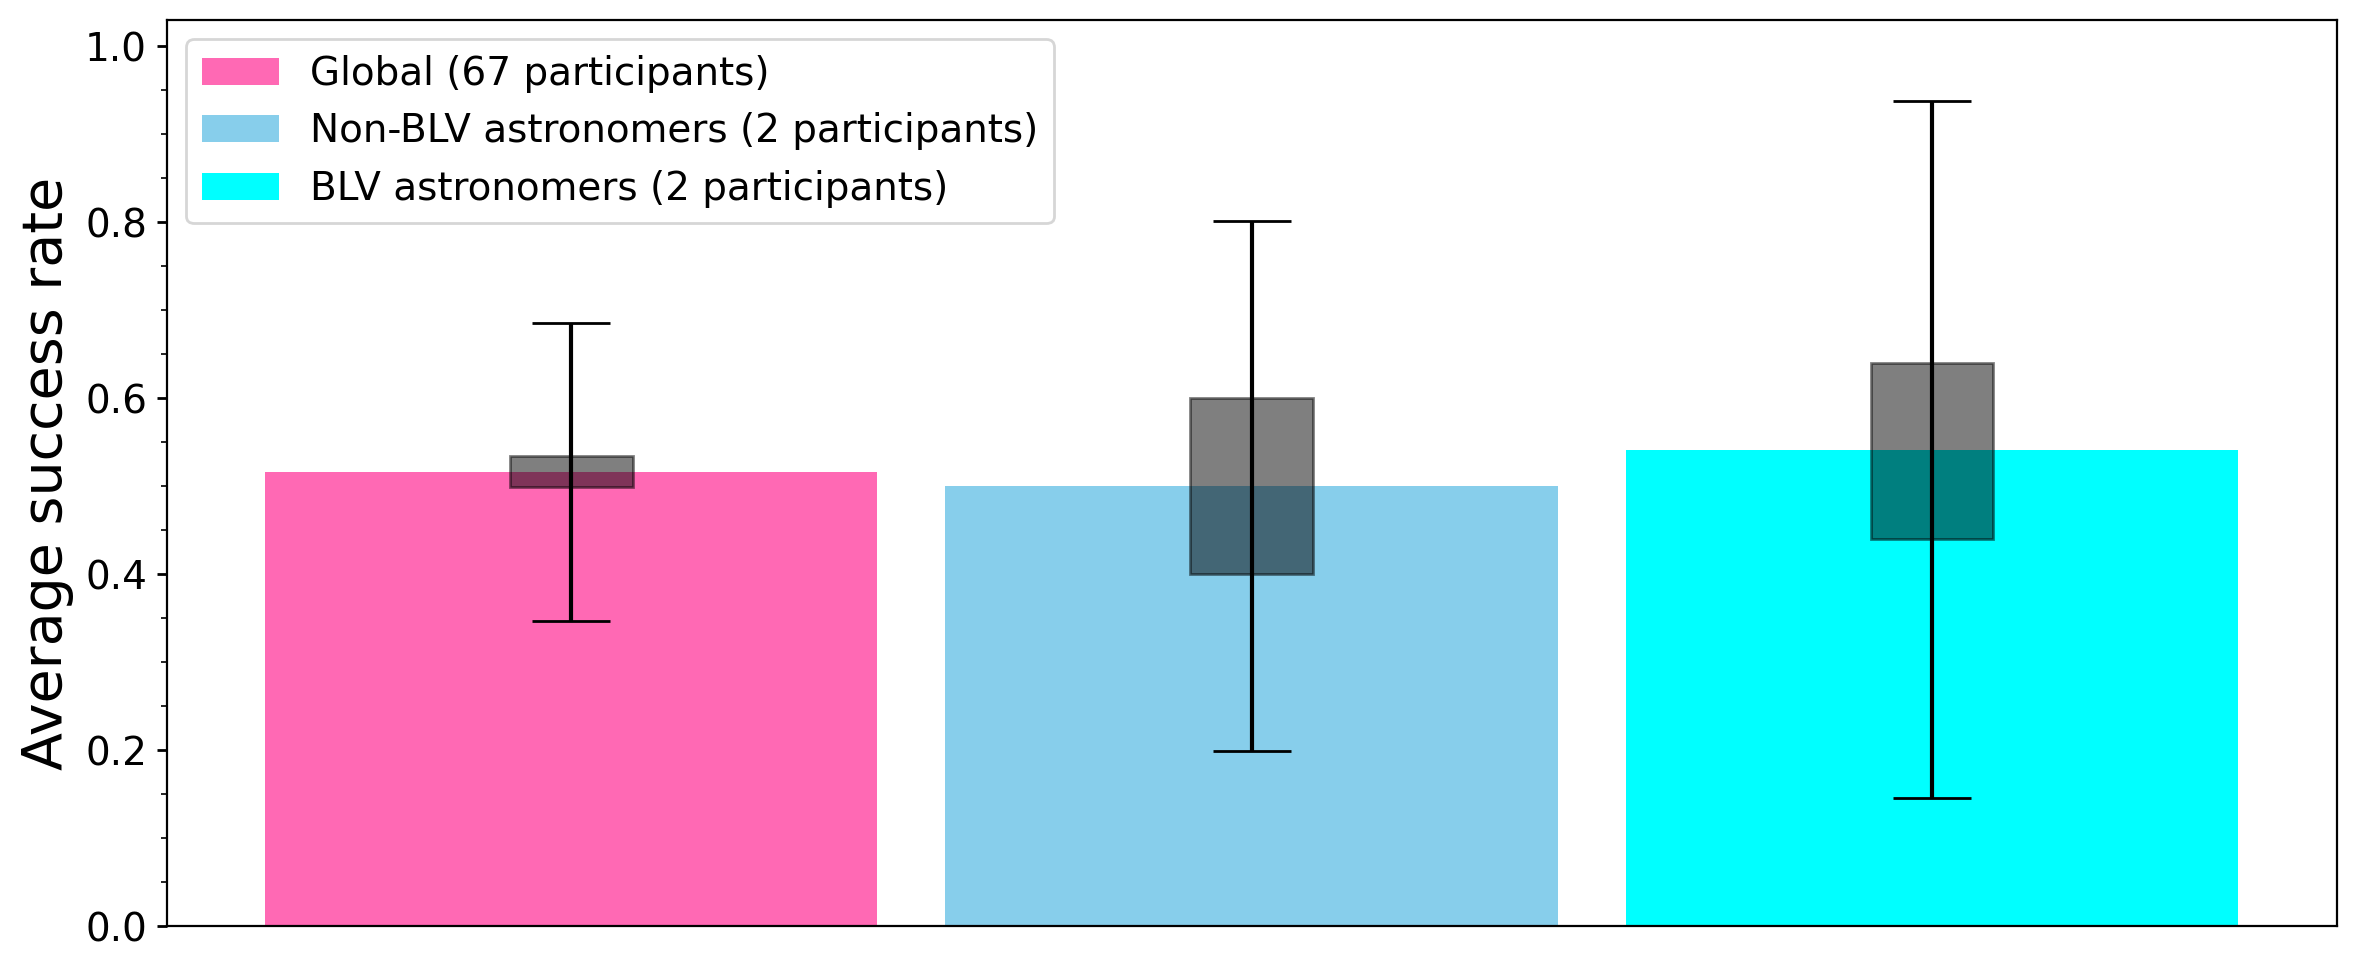

In [49]:
fig, ax = plt.subplots(figsize=(14,6),dpi=200)
x = np.arange(len(labels))
bar_width = .9
rects1 = ax.bar(1 - bar_width/2, means[0] , bar_width, yerr=data['std'][0], 
                label=labels[0] + " (" + str(participants[0]) + " participants)",color='hotpink', align='center',ecolor='black',capsize=14)
rects2 = ax.bar(2 - bar_width/2, means[1] , bar_width, yerr=data['std'][1], 
                label=labels[1] + " (" + str(participants[1]) + " participants)", color='skyblue', align='center',ecolor='black',capsize=14)
rects3 = ax.bar(3 - bar_width/2, means[2] , bar_width, yerr=data['std'][2], 
                label=labels[2] + " (" + str(participants[2]) + " participants)", color = 'aqua', align='center',ecolor='black',capsize=14)
ax.set_ylabel('Average success rate',size=20)

ax.tick_params(which='major', width=1.0, labelsize=14)
ax.yaxis.set_minor_locator(AutoMinorLocator())

ax.add_patch(Rectangle((0.46, data['Jeff_low'][0]), 
                       0.18, data['Jeff_high'][0]-data['Jeff_low'][0],
                       alpha=0.5,color='black'))
ax.add_patch(Rectangle((1.46, data['Jeff_low'][1]), 
                       0.18, data['Jeff_high'][1]-data['Jeff_low'][1],
                       alpha=0.5,color='black'))
ax.add_patch(Rectangle((2.46, data['Jeff_low'][2]), 
                       0.18, data['Jeff_high'][2]-data['Jeff_low'][2],
                       alpha=0.5,color='black'))
ax.set_xticks([])
ax.set_xticklabels([])
ax.set_ylim(0, 1.03)

ax.legend(fontsize=14,loc='upper left')
plt.savefig('ViewCube_plot1-BLV.png')
plt.show()

## Combined questions

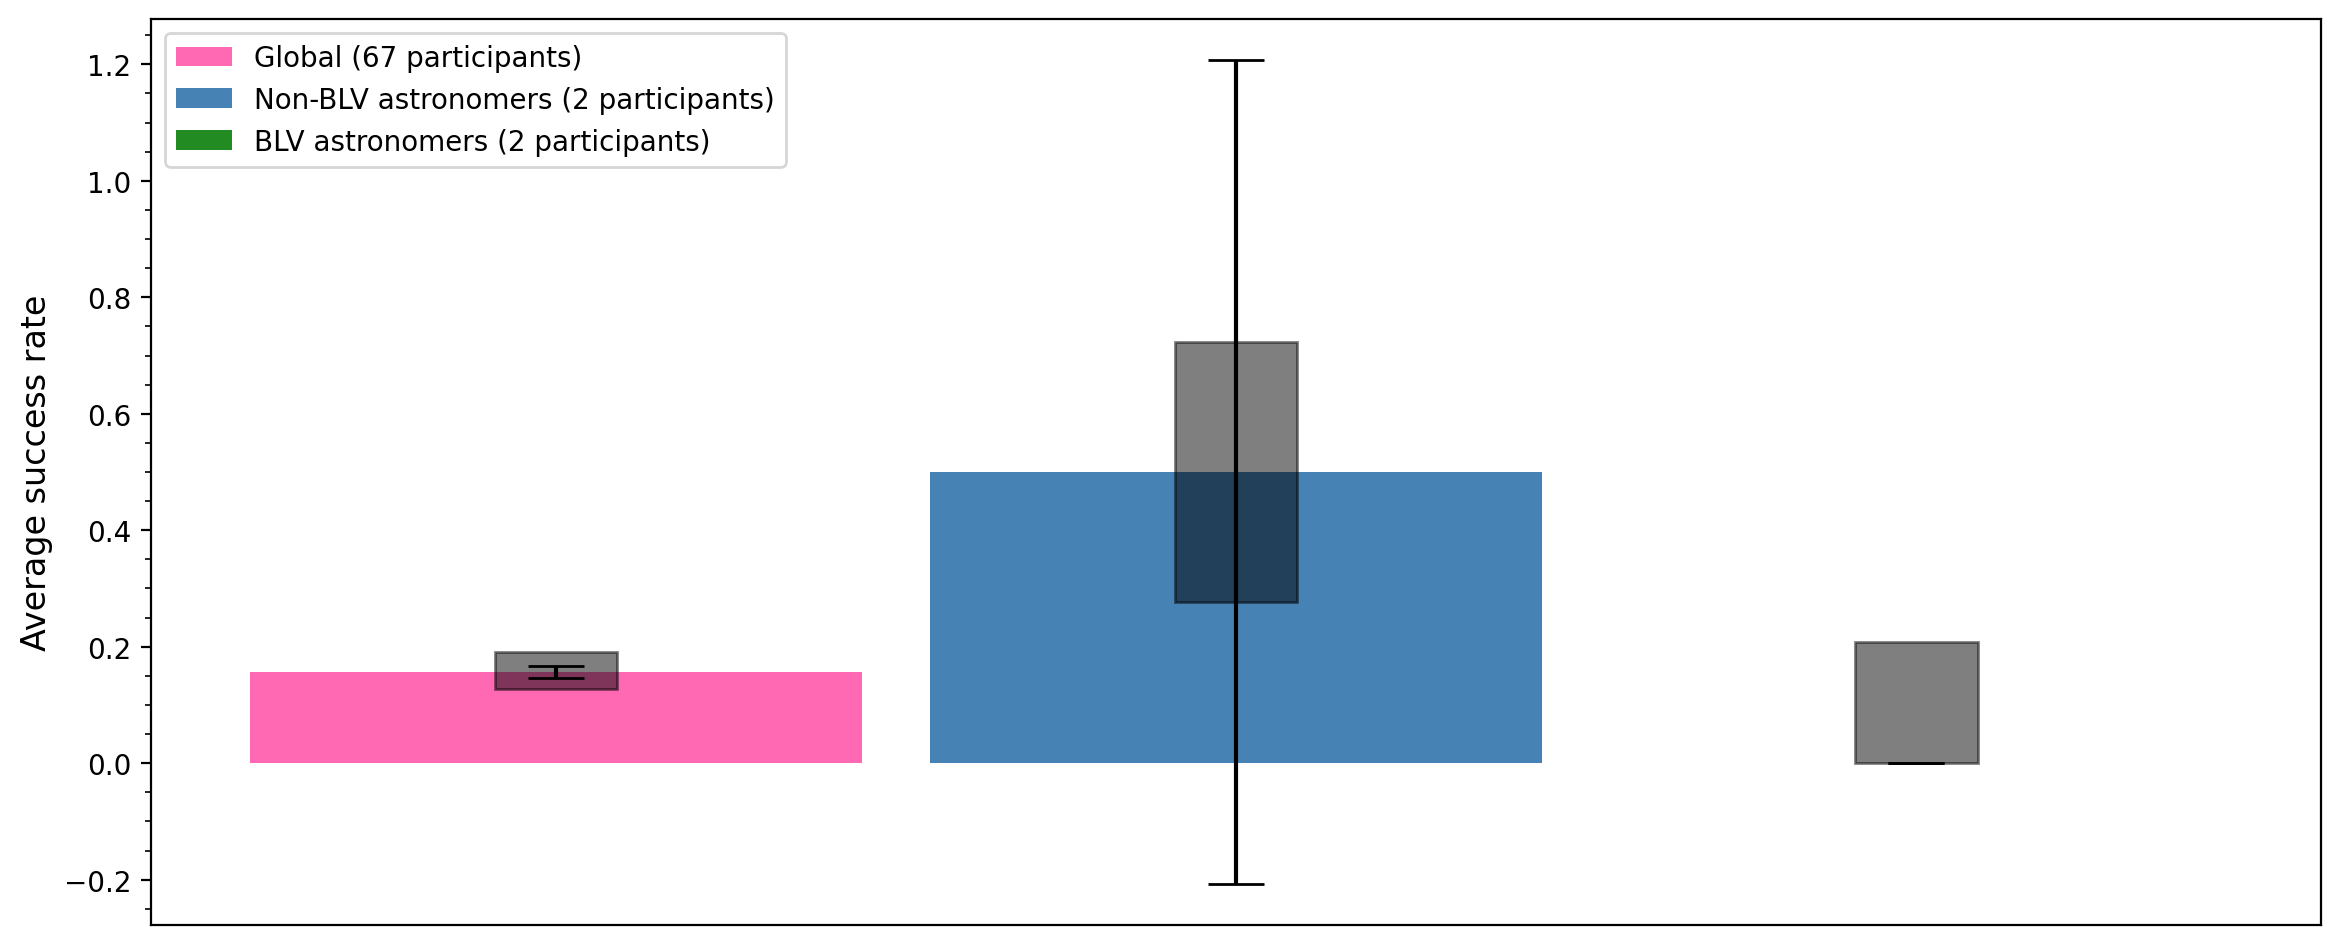

In [50]:
fig, ax = plt.subplots(figsize=(14,6),dpi=200)
x = np.arange(len(labels))
bar_width = .9
rects1 = ax.bar(1 - bar_width/2, comb_means[0] , bar_width, yerr=data['comb_std'][0], 
                label=labels[0] + " (" + str(participants[0]) + " participants)",color='hotpink', align='center',ecolor='black',capsize=10)
rects2 = ax.bar(2 - bar_width/2, comb_means[1] , bar_width, yerr=data['comb_std'][1], 
                label=labels[1] + " (" + str(participants[1]) + " participants)", color='steelblue', align='center',ecolor='black',capsize=10)
rects3 = ax.bar(3 - bar_width/2, comb_means[2] , bar_width, yerr=data['comb_std'][2], 
                label=labels[2] + " (" + str(participants[2]) + " participants)", color = 'forestgreen', align='center',ecolor='black',capsize=10)

ax.set_ylabel('Average success rate',size=12)
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.add_patch(Rectangle((0.46, data['comb_Jeff_low'][0]), 
                       0.18, data['comb_Jeff_high'][0]-data['comb_Jeff_low'][0],
                       alpha=0.5,color='black'))
ax.add_patch(Rectangle((1.46, data['comb_Jeff_low'][1]), 
                       0.18, data['comb_Jeff_high'][1]-data['comb_Jeff_low'][1],
                       alpha=0.5,color='black'))
ax.add_patch(Rectangle((2.46, data['comb_Jeff_low'][2]), 
                       0.18, data['comb_Jeff_high'][2]-data['comb_Jeff_low'][2],
                       alpha=0.5,color='black'))


ax.set_xticks([])
ax.set_xticklabels([])
ax.legend(fontsize=10,loc='upper left')
plt.savefig('ViewCube_plot2.png')
plt.show()

## Results summary

In [51]:
graph1 = [glob.describe(), experts.describe(), BLV.describe()]
graph2 = [glob_comb.describe(), experts_combined.describe(), BLV_combined.describe()]

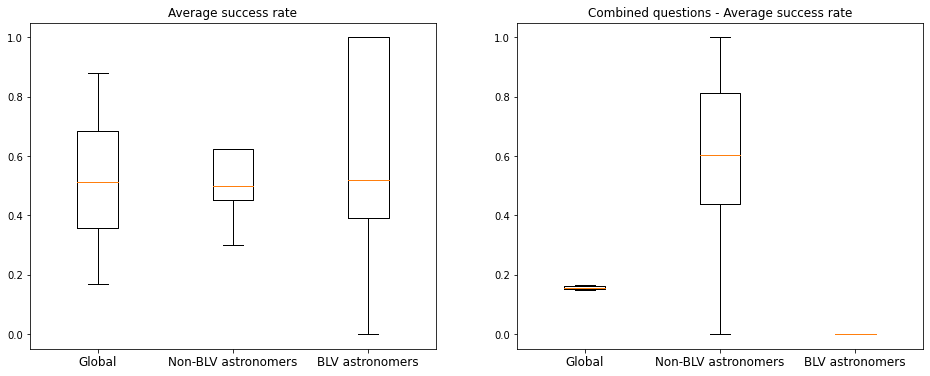

In [52]:
labels_1 = ["Global", "Non-BLV astronomers", "BLV astronomers"]
fig, ax = plt.subplots(1, 2, figsize=(16,6))
ax[0].boxplot(graph1, 0, '')
ax[0].set_xticklabels(labels_1, fontsize=12)
ax[0].set_title("Average success rate")

ax[1].boxplot(graph2, 0, '')
ax[1].set_xticklabels(labels_1, fontsize=12)
ax[1].set_title("Combined questions - Average success rate")
plt.savefig('ViewCube_boxplot1.png')

plt.show()

## Analysis by question

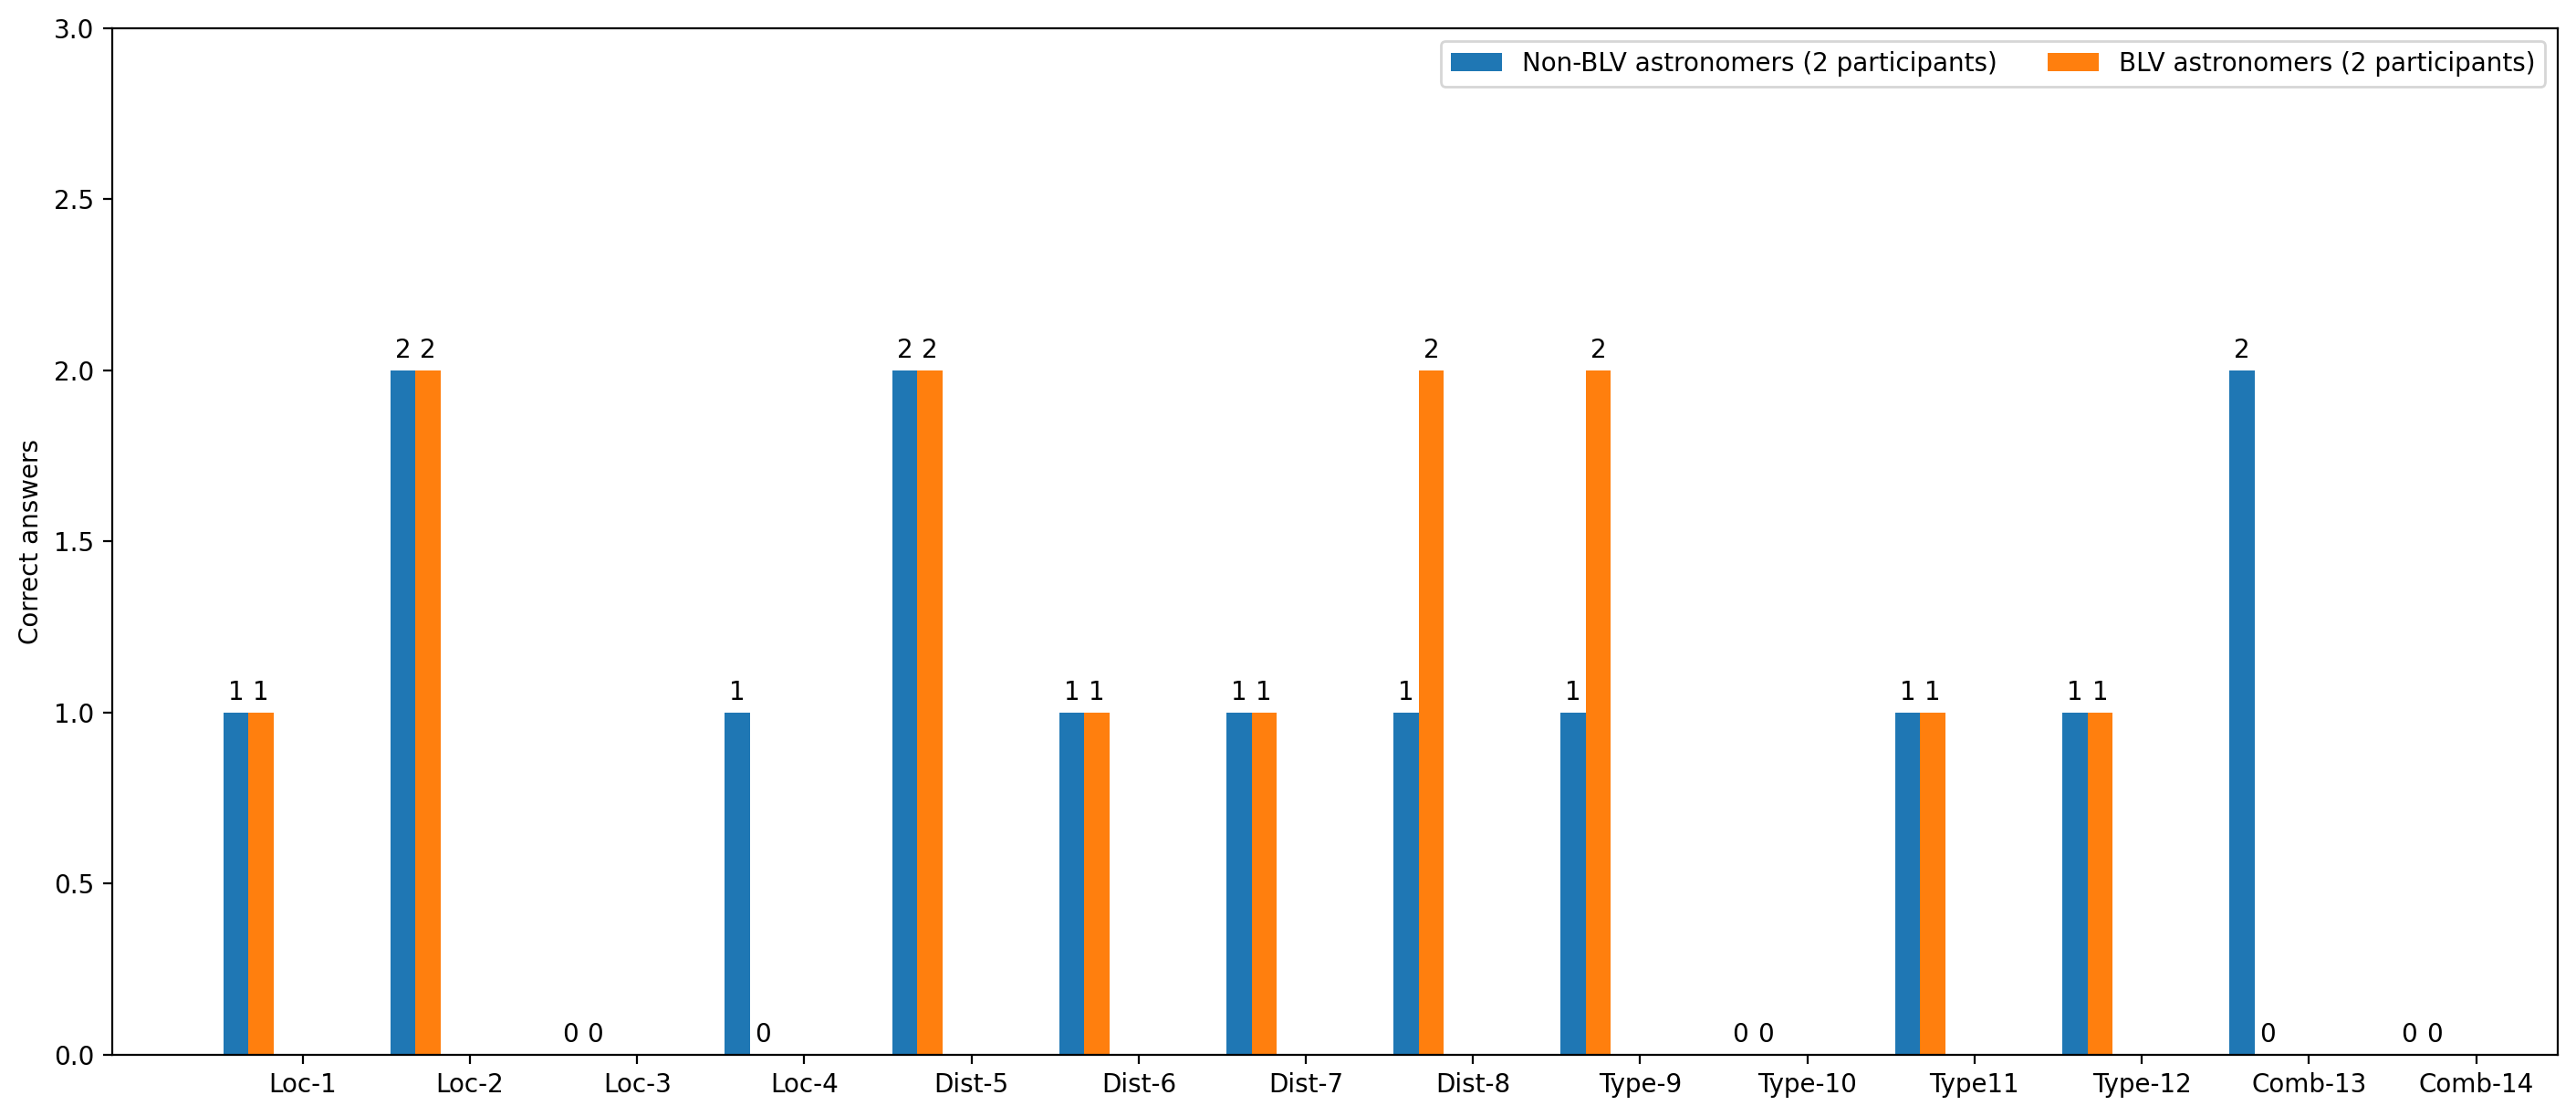

In [53]:
questions = ("Loc-1", "Loc-2", "Loc-3", "Loc-4", "Dist-5", "Dist-6", "Dist-7", "Dist-8", "Type-9", "Type-10","Type11", "Type-12", "Comb-13", "Comb-14")
success = {
    'Non-BLV astronomers (2 participants)': np.concatenate((experts_correct, experts_combined_correct)),
    'BLV astronomers (2 participants)': np.concatenate((BLV_correct, BLV_combined_correct)),
}

x = np.arange(len(questions))  
width = 0.15 
multiplier = 0

fig, ax = plt.subplots(figsize=(14,6),dpi=200, layout='constrained')

for attribute, measurement in success.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_ylabel('Correct answers')
ax.set_xticks(.25 + x + width, questions)
ax.legend(loc='upper right', ncols=3)
ax.set_ylim(0, 3)

plt.savefig('ViewCube_BLV-questions.png')
plt.show()